# Initial EDA
### Case Study 5, DAEN 400
October 31st, 2025

In [27]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Zillow data set

In [2]:
zillow_df = pd.read_csv('Zip_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv')

In [3]:
zillow_df = zillow_df[zillow_df['RegionName'] == 76065]

In [4]:
# Suppose your DataFrame is called zillow_df
# Identify the non-date columns (you said there are 9 of them)
non_date_cols = ['RegionID', 'SizeRank', 'RegionName', 'RegionType', 
                 'StateName', 'State', 'City', 'Metro', 'CountyName']

# Melt (unpivot) the DataFrame
zillow_df = zillow_df.melt(
    id_vars=non_date_cols,
    var_name='Date',
    value_name='ZHVI'
)

# Convert the Date column to datetime if needed
zillow_df['observation_date'] = pd.to_datetime(zillow_df['Date'], errors='coerce')

# Drop rows with NaN in Date (if there were any non-date columns that slipped in)
zillow_df = zillow_df.dropna(subset=['Date', 'ZHVI']).reset_index(drop=True)

# Convert to first day of each month
zillow_df['observation_date'] = zillow_df['observation_date'].dt.to_period('M').dt.to_timestamp()


In [5]:
zillow_df

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,Date,ZHVI,observation_date
0,91223,1922,76065,zip,TX,TX,Midlothian,"Dallas-Fort Worth-Arlington, TX",Ellis County,2009-01-31,188438.751221,2009-01-01
1,91223,1922,76065,zip,TX,TX,Midlothian,"Dallas-Fort Worth-Arlington, TX",Ellis County,2009-02-28,188099.168468,2009-02-01
2,91223,1922,76065,zip,TX,TX,Midlothian,"Dallas-Fort Worth-Arlington, TX",Ellis County,2009-03-31,187923.385526,2009-03-01
3,91223,1922,76065,zip,TX,TX,Midlothian,"Dallas-Fort Worth-Arlington, TX",Ellis County,2009-04-30,187400.473974,2009-04-01
4,91223,1922,76065,zip,TX,TX,Midlothian,"Dallas-Fort Worth-Arlington, TX",Ellis County,2009-05-31,186960.172194,2009-05-01
...,...,...,...,...,...,...,...,...,...,...,...,...
196,91223,1922,76065,zip,TX,TX,Midlothian,"Dallas-Fort Worth-Arlington, TX",Ellis County,2025-05-31,453405.242441,2025-05-01
197,91223,1922,76065,zip,TX,TX,Midlothian,"Dallas-Fort Worth-Arlington, TX",Ellis County,2025-06-30,452048.962695,2025-06-01
198,91223,1922,76065,zip,TX,TX,Midlothian,"Dallas-Fort Worth-Arlington, TX",Ellis County,2025-07-31,450995.150491,2025-07-01
199,91223,1922,76065,zip,TX,TX,Midlothian,"Dallas-Fort Worth-Arlington, TX",Ellis County,2025-08-31,450762.653868,2025-08-01


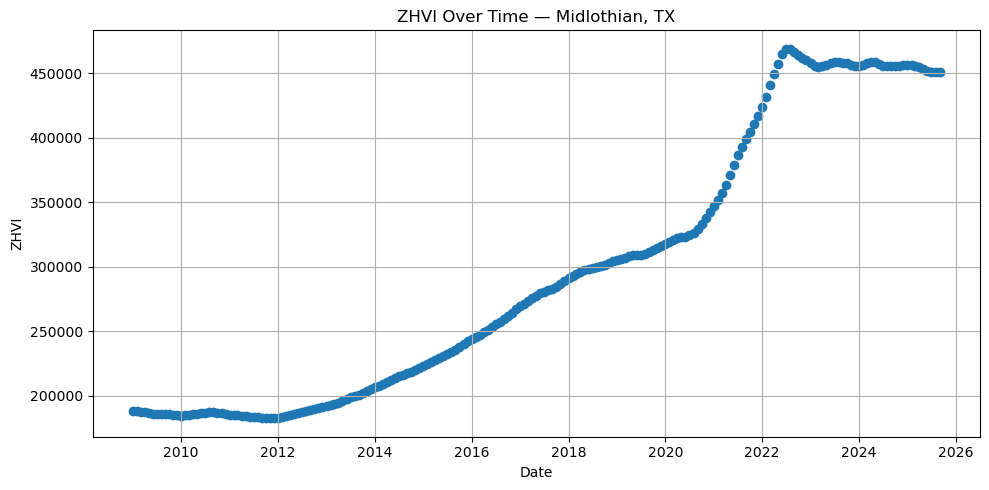

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.scatter(zillow_df['observation_date'], zillow_df['ZHVI'], marker='o')
plt.title(f"ZHVI Over Time — Midlothian, TX")
plt.xlabel("Date")
plt.ylabel("ZHVI")
plt.grid(True)
plt.tight_layout()
plt.savefig('Figures/zhvi_overTime.svg')


# Realtor.com data set

In [7]:
realtor_df = pd.read_csv('RDC_Inventory_Hotness_Metrics_Zip_History.csv')

In [8]:
realtor_df = realtor_df[realtor_df['postal_code'] == 76065]

def parse_date(row):
    year = str(row['month_date_yyyymm'])[0:4]
    month = str(row['month_date_yyyymm'])[4:]
    day = '01' # Default to first day of month

    date = '-'.join([year, month, day])
    
    return date

realtor_df['observation_date'] = realtor_df.apply(parse_date, axis=1)

# Type cast date
realtor_df['observation_date'] = pd.to_datetime(realtor_df['observation_date'])

# Sort chronilogicaly 
realtor_df = realtor_df.sort_values(by='observation_date')

In [9]:
realtor_df

,month_date_yyyymm,postal_code,zip_name,hh_rank,hotness_rank,hotness_rank_mm,hotness_rank_yy,hotness_score,supply_score,demand_score,...,median_dom_vs_us,page_view_count_per_property_mm,page_view_count_per_property_yy,page_view_count_per_property_vs_us,median_listing_price,median_listing_price_mm,median_listing_price_yy,median_listing_price_vs_us,quality_flag,observation_date
304220,201708,76065,"midlothian, tx",1419,3674,3674,NaN,71.983755,61.824430,82.143080,...,-5.75,NaN,NaN,1.479739,354118.25,0.010401,0.071657,1.287703,0,2017-08-01
526105,201709,76065,"midlothian, tx",1419,4006,4006,NaN,70.734590,60.036076,81.433103,...,-4.50,-0.094638,NaN,1.476040,357115.50,0.008464,0.092036,1.298602,0,2017-09-01
142123,201710,76065,"midlothian, tx",1419,2665,2665,NaN,77.803030,72.279040,83.327020,...,-14.50,0.071094,NaN,1.527860,358999.50,0.005276,0.048174,1.305453,0,2017-10-01
374731,201711,76065,"midlothian, tx",1419,4535,4535,NaN,67.255952,65.055810,69.456094,...,-10.00,-0.217004,NaN,1.206123,360298.25,0.003618,0.047292,1.312825,0,2017-11-01
990891,201712,76065,"midlothian, tx",1419,4858,4858,NaN,64.400775,50.063498,78.738052,...,1.00,0.146832,NaN,1.430673,355673.00,-0.012837,0.016238,1.317795,0,2017-12-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27380,202505,76065,"midlothian, tx",1419,6116,6116,-1965.0,50.274874,40.758808,59.790941,...,0.00,0.077286,0.116865,1.150152,539900.00,-0.009358,-0.002485,1.227045,0,2025-05-01
697061,202506,76065,"midlothian, tx",1419,6142,6142,-2588.0,50.860643,42.288034,59.433253,...,0.25,-0.031747,0.116202,1.143831,546000.00,0.011298,0.001835,1.238236,0,2025-06-01
897870,202507,76065,"midlothian, tx",1419,6408,6408,-2796.0,50.151582,40.128660,60.174505,...,0.50,0.055553,0.264894,1.138221,539475.00,-0.011951,0.022701,1.227614,0,2025-07-01
816133,202508,76065,"midlothian, tx",1419,7617,7617,-2047.0,44.388385,31.970962,56.805808,...,7.00,-0.095043,0.298687,1.080314,540000.00,0.000973,0.028571,1.255843,0,2025-08-01


<Figure size 1000x500 with 0 Axes>

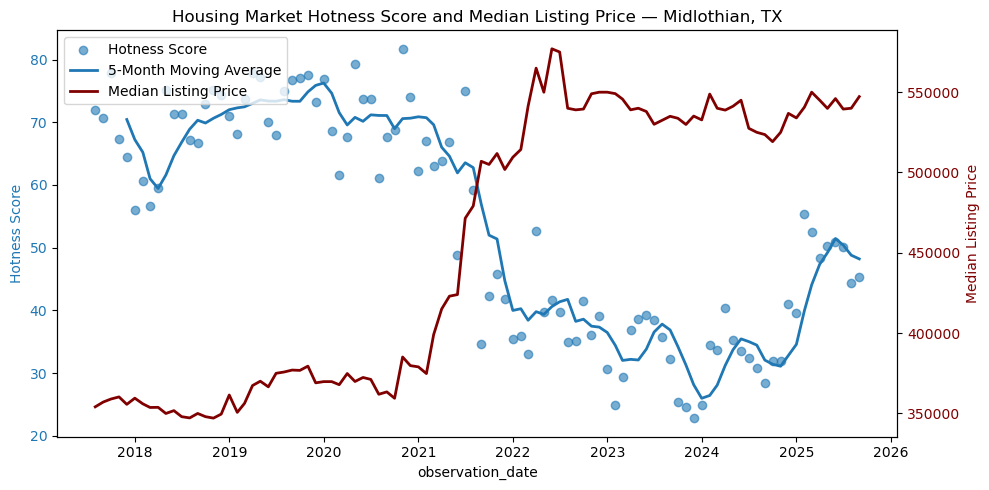

In [35]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

# --- Left axis (Hotness Score) ---
fig, ax1 = plt.subplots(figsize=(10, 5))
ax1.scatter(realtor_df['observation_date'], realtor_df['hotness_score'], marker='o', alpha=0.6, label='Hotness Score', color='tab:blue')

# 5-month moving average
realtor_df['MA'] = realtor_df['hotness_score'].rolling(window=5).mean()
ax1.plot(realtor_df['observation_date'], realtor_df['MA'], linewidth=2, color='tab:blue', label='5-Month Moving Average')

ax1.set_xlabel("observation_date")
ax1.set_ylabel("Hotness Score", color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# --- Right axis (Median Listing Price) ---
set_color = 'maroon'
ax2 = ax1.twinx()  # create secondary y-axis sharing the same x-axis
ax2.plot(realtor_df['observation_date'], realtor_df['median_listing_price'], color=set_color, linewidth=2, label='Median Listing Price')
ax2.set_ylabel("Median Listing Price", color=set_color)
ax2.tick_params(axis='y', labelcolor=set_color)

# --- Formatting ---
plt.title("Housing Market Hotness Score and Median Listing Price — Midlothian, TX")
fig.tight_layout()
plt.grid(True, which='major', axis='x', linestyle='--', alpha=0.7)

# --- Combined Legend ---
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')
plt.tight_layout()
plt.savefig('Figures/medianHousePrice_overTime.svg')

# Load FRED data

In [11]:
mortgage = pd.read_csv('30yrMortgageRates.csv')
fedFunds = pd.read_csv('FEDFUNDS.csv')
cpi = pd.read_csv('median_cpi.csv')
ur = pd.read_csv('TXUR.csv')

In [12]:
# Convert columns to correct type
fedFunds['observation_date'] = pd.to_datetime(fedFunds['observation_date'])
cpi['observation_date'] = pd.to_datetime(cpi['observation_date'])
ur['observation_date'] = pd.to_datetime(ur['observation_date'])

ur['unemployment_rate_TX'] = ur['TXUR']
fedFunds['fed_funds'] = fedFunds['DFF']

# Convert observation_date to datetime if it's not already
mortgage['observation_date'] = pd.to_datetime(mortgage['observation_date'])

# Create a year-month column for grouping
mortgage['year_month'] = mortgage['observation_date'].dt.to_period('M')

# Group by year-month and calculate mean
monthly_mortgage = mortgage.groupby('year_month')['MORTGAGE30US'].mean().reset_index()

# Convert year_month back to datetime (first day of month)
monthly_mortgage['observation_date'] = monthly_mortgage['year_month'].dt.to_timestamp()

# Drop the temporary year_month column
monthly_mortgage = monthly_mortgage.drop('year_month', axis=1)

# Combine all data

In [13]:
from functools import reduce

# List of dataframes to join
dataframes = [
    cpi, fedFunds[['observation_date', 'fed_funds']], monthly_mortgage, ur[['observation_date', 'unemployment_rate_TX']],
    # realtor_df[['observation_date', 'median_listing_price', 'hotness_score', 'supply_score', 'demand_score']]
    zillow_df[['observation_date', 'ZHVI']]
]

# Join all dataframes on observation_date
combined_data = reduce(lambda left, right: pd.merge(left, right, on='observation_date', how='inner'), 
                      dataframes)

combined_data['cpi'] = combined_data['MEDCPIM158SFRBCLE']
combined_data['mortgage'] = combined_data['MORTGAGE30US']
combined_data.drop(columns=['MEDCPIM158SFRBCLE', 'MORTGAGE30US'], inplace=True)

# Do some feature engineering
# Year-over-year change (more stable and meaningful)
combined_data['zhvi_yoy_change'] = combined_data['ZHVI'].pct_change(12) * 100

# Month-over-month change
combined_data['zhvi_mom_change'] = combined_data['ZHVI'].pct_change() * 100

# Log transformation for exponential growth
combined_data['log_zhvi'] = np.log(combined_data['ZHVI'])

In [14]:
combined_data

,observation_date,fed_funds,unemployment_rate_TX,ZHVI,cpi,mortgage,zhvi_yoy_change,zhvi_mom_change,log_zhvi
0,2009-01-01,0.14,6.1,188438.751221,2.403641,5.0475,NaN,NaN,12.146528
1,2009-02-01,0.23,6.3,188099.168468,2.143576,5.1300,NaN,-0.180209,12.144725
2,2009-03-01,0.22,6.4,187923.385526,1.908290,5.0025,NaN,-0.093452,12.143790
3,2009-04-01,0.16,6.5,187400.473974,1.861170,4.8100,NaN,-0.278258,12.141003
4,2009-05-01,0.22,7.6,186960.172194,1.293769,4.8575,NaN,-0.234952,12.138651
...,...,...,...,...,...,...,...,...,...
195,2025-04-01,4.33,4.1,454746.398462,3.980957,6.7250,-0.905230,-0.219994,13.027495
196,2025-05-01,4.33,4.1,453405.242441,2.695123,6.8160,-1.138044,-0.294924,13.024542
197,2025-06-01,4.33,4.0,452048.962695,4.084968,6.8175,-1.177501,-0.299132,13.021546
198,2025-07-01,4.33,4.0,450995.150491,3.367945,6.7200,-1.103336,-0.233119,13.019212


In [15]:
#Save it to a csv
combined_data.to_csv("combined_data.csv", index = False)

In [ ]:
def analyze_lagged_correlations(df, target_col='ZHVI', max_lag=12):
    """
    Analyze correlations between target and lagged features
    """
    results = []
    
    # Get base features (exclude date, target, and already lagged features)
    base_features = [col for col in df.columns 
                     if col not in ['observation_date', target_col, 'log_zhvi'] 
                     and 'lag' not in col]
    
    for feature in base_features:
        # Current period correlation
        if not df[feature].isna().all():
            current_corr = df[feature].corr(df[target_col])
            results.append({
                'Feature': feature,
                'Lag': 0,
                'Correlation': current_corr,
                'Abs_Correlation': abs(current_corr)
            })
        
        # Lagged correlations
        for lag in range(1, max_lag + 1):
            lagged_feature = df[feature].shift(lag)
            if not lagged_feature.isna().all():
                lagged_corr = lagged_feature.corr(df[target_col])
                results.append({
                    'Feature': feature,
                    'Lag': lag,
                    'Correlation': lagged_corr,
                    'Abs_Correlation': abs(lagged_corr)
                })
    
    return pd.DataFrame(results)

# Analyze lagged correlations
lag_analysis = analyze_lagged_correlations(combined_data, max_lag=12)

# Alternative way to get best lags
best_lags = (lag_analysis.sort_values('Abs_Correlation', ascending=False)
            .groupby('Feature')
            .first()
            .reset_index())

print(best_lags[['Feature', 'Lag', 'Correlation', 'Abs_Correlation']].sort_values('Abs_Correlation', ascending=False))

                Feature  Lag  Correlation  Abs_Correlation
1             fed_funds    0     0.772289         0.772289
0                   cpi    4     0.766660         0.766660
3  unemployment_rate_TX    0    -0.569157         0.569157
2              mortgage    0     0.542033         0.542033
5       zhvi_yoy_change   12     0.428694         0.428694
4       zhvi_mom_change   12     0.313821         0.313821


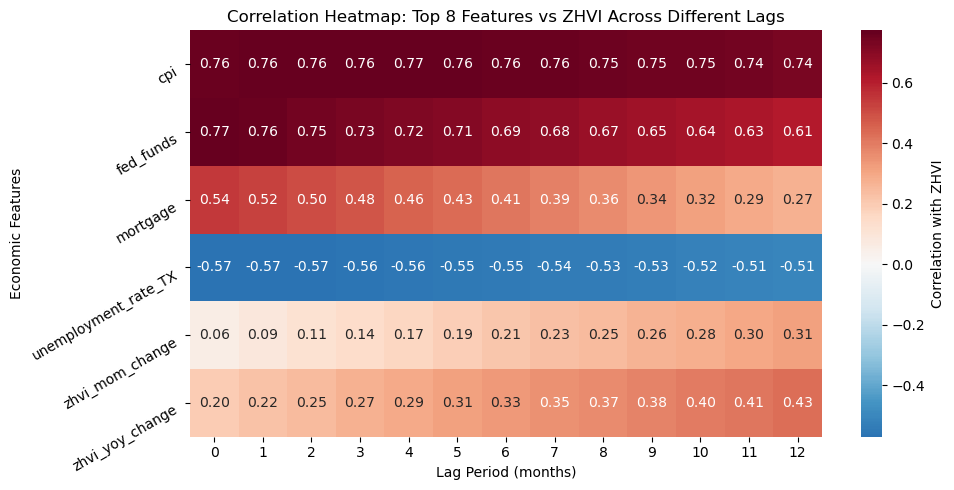

<Figure size 640x480 with 0 Axes>

In [48]:
# Create a heatmap showing correlation strength across different lags
def plot_lag_heatmap(lag_analysis, top_n=8):
    """Plot heatmap of correlations across different lag periods"""
    
    # Get top features by maximum absolute correlation
    top_features = (lag_analysis.groupby('Feature')['Abs_Correlation'].max()
                   .sort_values(ascending=False).head(top_n).index)
    
    # Filter data for top features
    top_data = lag_analysis[lag_analysis['Feature'].isin(top_features)]
    
    # Pivot for heatmap
    heatmap_data = top_data.pivot(index='Feature', columns='Lag', values='Correlation')
    
    # Create heatmap
    plt.figure(figsize=(10, 5))
    sns.heatmap(heatmap_data, 
                annot=True, 
                cmap='RdBu_r', 
                center=0, 
                fmt='.2f',
                cbar_kws={'label': 'Correlation with ZHVI'})
    plt.title(f'Correlation Heatmap: Top {top_n} Features vs ZHVI Across Different Lags')
    plt.xlabel('Lag Period (months)')
    plt.ylabel('Economic Features')
    plt.yticks(rotation=30, va='top')
    plt.tight_layout()
    plt.show()

# Create the heatmap
plot_lag_heatmap(lag_analysis, top_n=8)
plt.savefig('Figures/lag_correlate.svg')

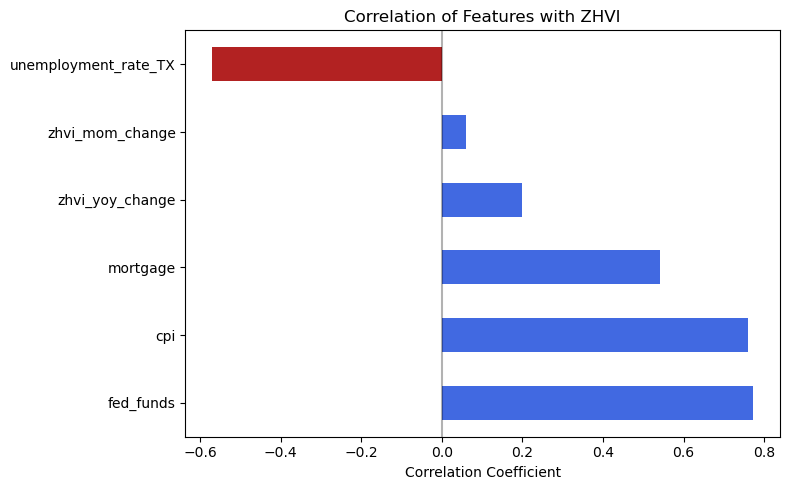

In [53]:
# Get correlations with ZHVI specifically
zhvi_correlations = combined_data.corr()['ZHVI'].sort_values(ascending=False)

# Remove ZHVI's correlation with itself
zhvi_correlations = zhvi_correlations.drop(['ZHVI', 'observation_date', 'log_zhvi'])

# Create horizontal bar plot
plt.figure(figsize=(8, 5))
colors = ['firebrick' if x < 0 else 'royalblue' for x in zhvi_correlations.values]
zhvi_correlations.plot(kind='barh', color=colors)
plt.title('Correlation of Features with ZHVI')
plt.xlabel('Correlation Coefficient')
plt.axvline(x=0, color='black', linestyle='-', alpha=0.3)
# plt.yticks(rotation=30, va='top')
plt.tight_layout()
plt.savefig('Figures/correlation_bar.svg')